https://www.kaggle.com/milanzdravkovic/pharma-sales-data

M01AB - Противовоспалительные и противоревматические продукты, нестероиды, производные уксусной кислоты и родственные вещества
M01AE - Противовоспалительные и противоревматические продукты, нестероиды, производные пропионовой кислоты
N02BA - Другие анальгетики и жаропонижающие средства, Салициловая кислота и производные
N02BE/B - Другие анальгетики и жаропонижающие средства, пиразолоны и анилиды
N05B - Психолептические препараты, Анксиолитические препараты
N05C - Психолептические, снотворные и седативные средства
R03 - Лекарства от обструктивных заболеваний дыхательных путей
R06 - Антигистаминные препараты для системного применения

Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.

Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('salesdaily.csv')
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


In [5]:
#Посчитаем ежемесячные продажи по каждой категории препаратов и посмотрим, зависимость выручки от временного периода (месяцы)
df_monthly = df[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06','Year','Month']].groupby(['Year','Month']).sum()
df_monthly.head()

M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
Year Month                                                               
2014 1      127.69   99.090  152.100   878.030  354.0  30.0  112.0   48.2
     2      133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
     3      137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
     4      113.10   89.475  125.150   698.500  209.0  18.0   97.0   73.7
     5      101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7

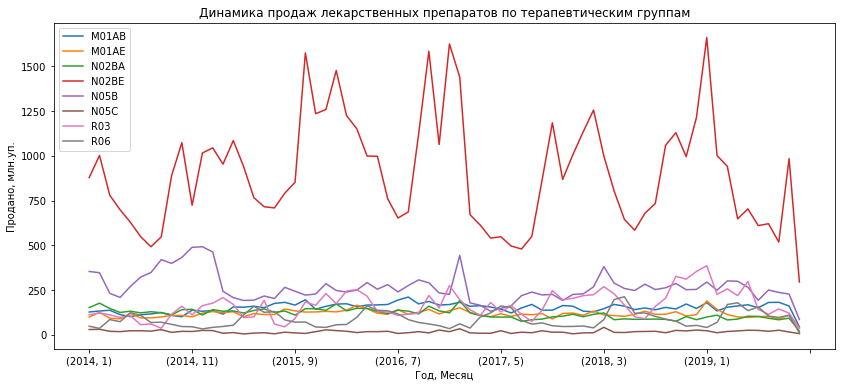

In [6]:
# Построим график помесячной динамики продаж препаратов в различных терапевтических группах 
ax = df_monthly.plot(title='Динамика продаж лекарственных препаратов по терапевтическим группам', 
                             xlabel='Год, Месяц', 
                             ylabel='Продано, млн.уп.') 
ax.legend(loc='upper left')

Вывод по графику 1 'Динамика продаж лекарственных препаратов по терапевтическим группам' 
Из данного графика видно, что продажи некоторым категориям (например, N02BE и R03) достаточно скачкообразны, это позволяет
предположить сезонность продаж препаратов в данных терапевтических группах. 
На графике также видно, что продажи всех терапевтических категорий достаточно стабильны в долгосрочной динамике и визуально
не наблюдается восходящей или нисходящей тенденции ни на одном графике.

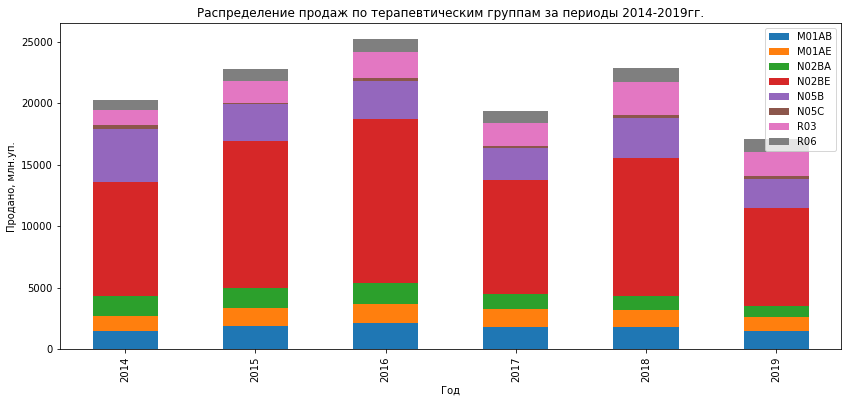

In [7]:
# Посмотрим, на состав продаж по терапевтическим группам для каждого года выборки
df_year = df_monthly.groupby(['Year']).sum()
df_year.head()
df_year.plot(kind='bar',title='Распределение продаж по терапевтическим группам за периоды 2014-2019гг.', 
                              xlabel='Год', 
                              ylabel='Продано, млн.уп.', stacked=True)

Вывод по графику 2 'Распределение продаж по терапевтическим группам за периоды 2014-2019гг.' 
Из данного графика видно, что в целом значительных отклонений в структуре продаж по терапевтическим группам не наблюдается,
однако есть незначительные изменения:
    1) В первые три года видна незначительная позитивная динамика роста продаж, однако после падения продаж в 2017 году, 
    рынок ведет себя более скачкообразно. Видно, что самое значительное падение продаж в 2017 пришлось на 
    группу N02BE(Другие анальгетики и жаропонижающие средства, пиразолоны и анилиды). При этом схожая группа 
    N02BA (Другие анальгетики и жаропонижающие средства, Салициловая кислота и производные) компенсирующего роста не показала, 
    она также показала отрицательную динамику, что говорит о внешних факторах на рынке (возможно, низкая заболеваемость ОРВИ в 
    этом году). 
    2) В 2014 году на группу N05B (Психолептические препараты, Анксиолитические препараты) пришлась значительная доля продаж, в последующие годы, несмотря на позитивную динамику в первые
    годы, такого объема продаж группы не наблюдалось.
    3) В 2015 году значительно сократился объем продаж группы N05C (Психолептические, снотворные и седативные средства)
    4) Визуально наиболее стабильна доля продаж групп 
    M01AB (Противовоспалительные и противоревматические продукты, нестероиды, производные уксусной кислоты и родственные вещества)
    M01AE (Противовоспалительные и противоревматические продукты, нестероиды, производные пропионовой кислоты) и 
    N02BA (Другие анальгетики и жаропонижающие средства, Салициловая кислота и производные)

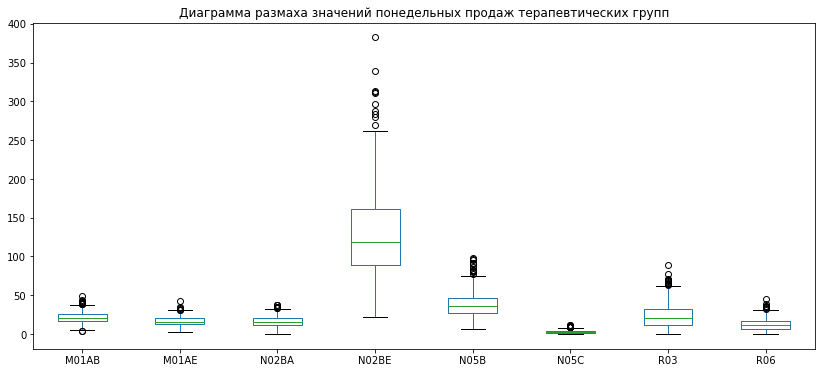

In [9]:
# Сравним диаграммы размаха значений понедельных продаж для каждой терапевтической группы
df_weekly = df[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06','Year','Month','Weekday Name']].groupby(['Year','Month','Weekday Name']).sum().reset_index()
df_weekly[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']].plot(kind='box',
                                        title='Диаграмма размаха значений понедельных продаж терапевтических групп')

Вывод по графику 3 'Диаграмма размаха значений понедельных продаж терапевтических групп' 
Из данного графика видно, что по продажам во всех терапевтических группах наблюдаются выбросы,
группа M01AB интересна тем, что только в ней виден выброс снизу. 
При схожем объеме продаж для групп N05B и R03, видно, что нижний размах у N05B выше, характер верхнего размаха и выбросов
при этом для данных групп схож. Медиана для данных категорий приблизительно расположена посередине ящика.
Медиана же для категории N02BE значительно смещена к нижнему краю ящика. Учитывая, что продажи в категории N02BE - наиболее велики - посмотрим как изменится характер выбросов в зависимости от дня недели. 

In [11]:
import seaborn as sns

Text(0.5, 1.0, 'Диаграмма размаха значений понедневных продаж терапевтической группы N02BE')

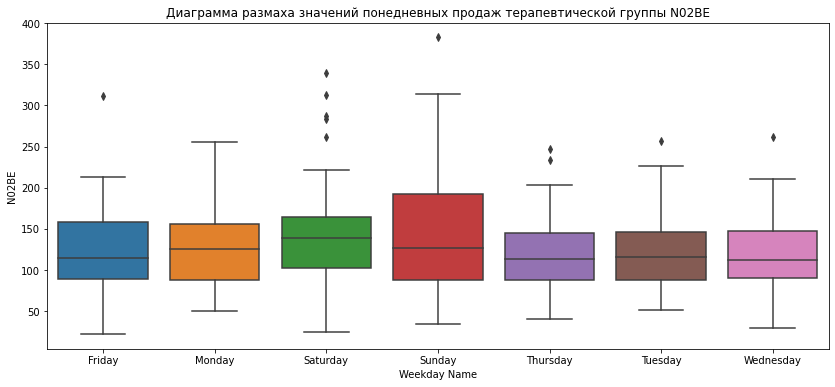

In [12]:
#Посмотрим, как изменятся характер ящика с усами, если смотреть на выбросы в разрезе по дням недели

bx = sns.boxplot(x="Weekday Name", y="N02BE", 
            data=df_weekly)
bx.set_title('Диаграмма размаха значений понедневных продаж терапевтической группы N02BE')

Вывод по графику 4 'Диаграмма размаха значений понедневных продаж терапевтической группы N02BE'
Из графика видно, что наиболее значительные выбросы сверху характерны для выходных дней, что позволяет выдвинуть гипотезу, 
о том, что в выходные дни люди, заболев, пытаются вылечиться сами, 
наиболее известными препаратами группы N02BE (Другие анальгетики и жаропонижающие средства, пиразолоны и анилиды)

Text(0.5, 1.0, 'Корреляция между продажами препаратов двух терапевтических категорий N02BE и R03')

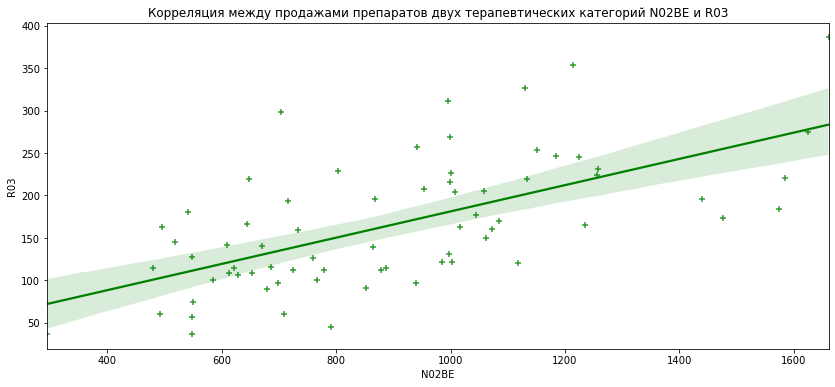

In [13]:
# Из графика 1 мы сделали предположение, что продажи групп N02BE и R03 похожи между собой по сезонности
#Посмотрим корреляцию продаж терапевтических групп: 'N02BE' и 'R03':
ax = sns.regplot(data = df_monthly[['N02BE','R03']], x='N02BE', y='R03', color='green', marker='+')
ax.set_title('Корреляция между продажами препаратов двух терапевтических категорий N02BE и R03')

Из графика 5 'Корреляция между продажами препаратов двух терапевтических категорий N02BE и R03' мы видим, что зависимость 
продаж препаратов двух групп (N02BE Другие анальгетики и жаропонижающие средства, пиразолоны и анилиды и 
                              R03 Лекарства от обструктивных заболеваний дыхательных путей)
есть, но сильной ее назвать нельзя. На основании чего можно выдвинуть гипотезу о том, что скорее всего, продажи R03
могут происходить например, в осложненных случаях простудных заболеваний.

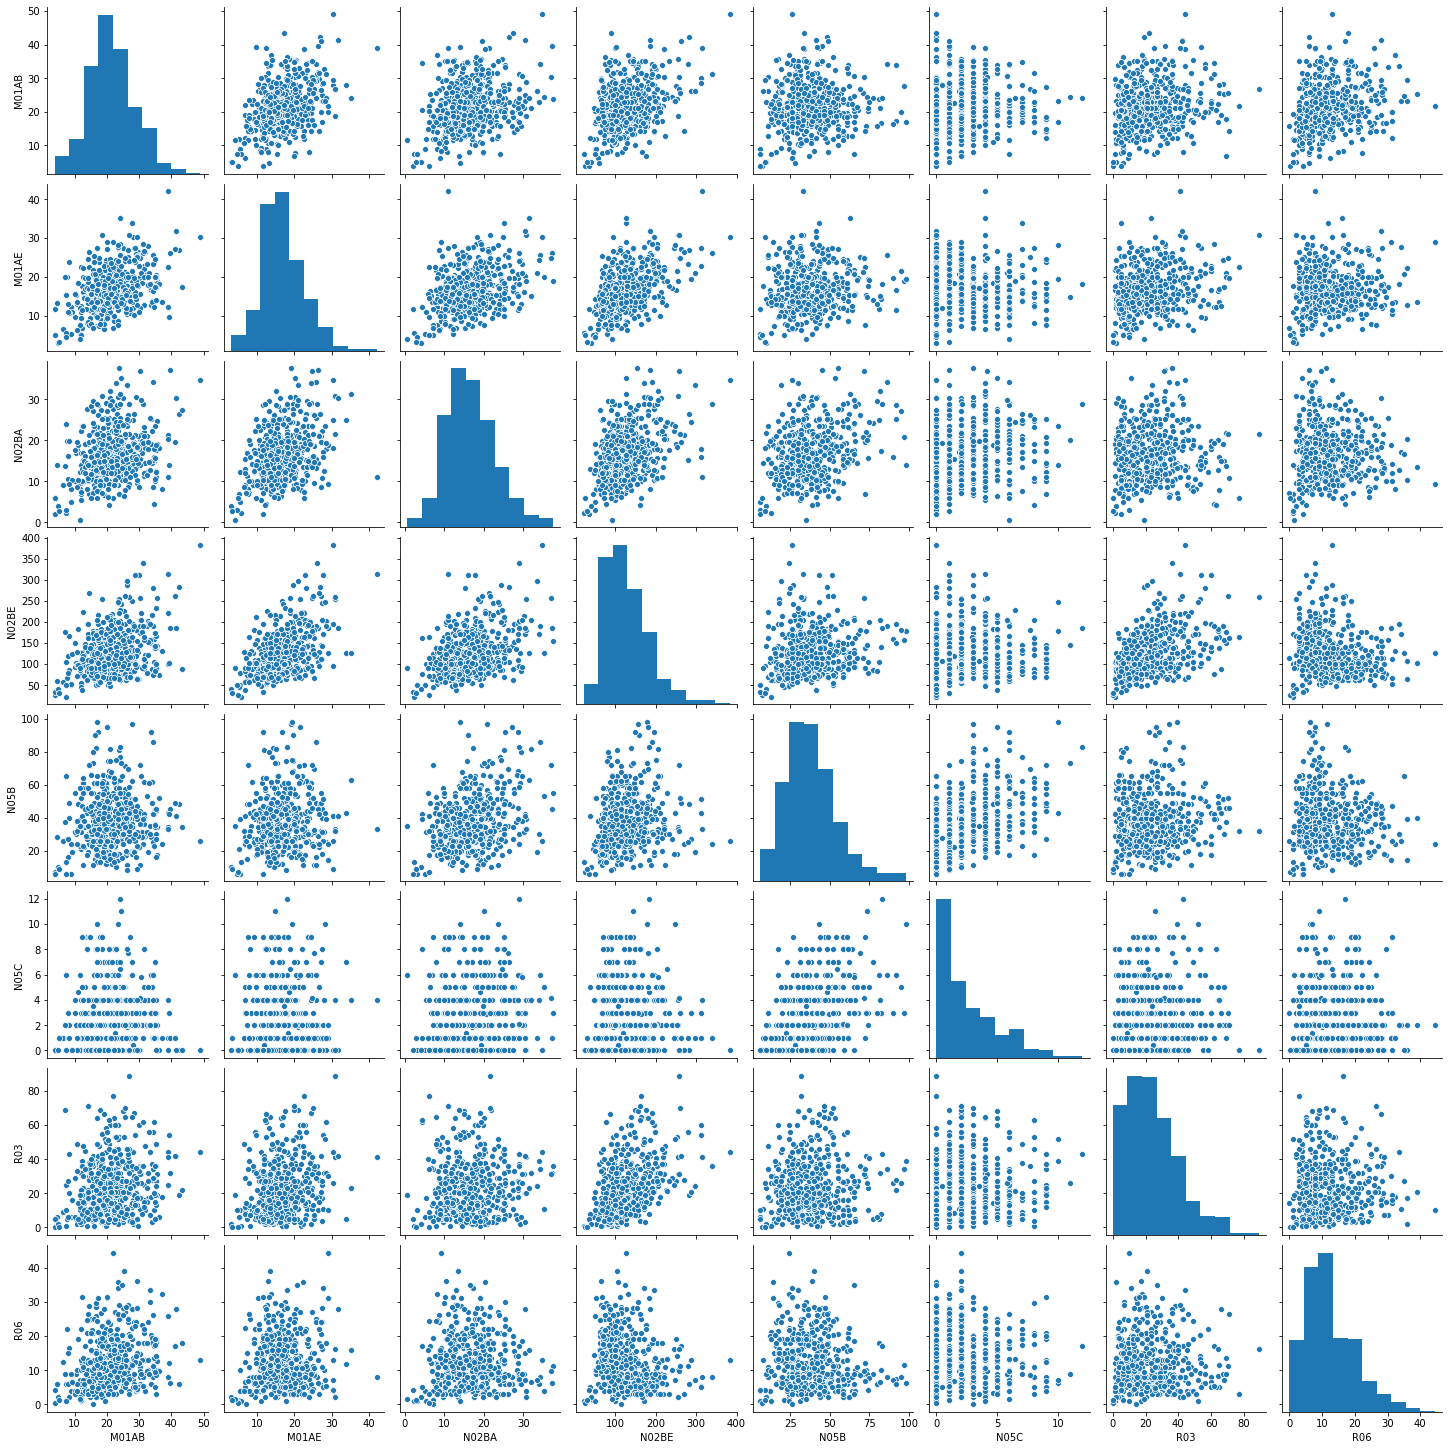

In [15]:
# Посмотрим на корредяцию продаж различных терапевтических групп между собой.
sns.pairplot(df_weekly[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']])

Из графика видно, что положительная корреляция (рост продаж одной категории с ростом продаж для другой группы наиболее сильно 
наблюдается для следующих пар:
N02BE - R03
N02BE - N02BA
M01AB - M01ABE
N02BA - M01ABE
N02BE - N05B)
Один из наиболее сгруппированных облаков пара: N02BE - R03 (схожая сезонность продаж этих групп была видна еще на графике 1, и 
анализ графиков корреляции подтвердил это предположение)
Для таких вариантов пар, в дальнейшем можно использовать поддерживаюшие маркетинговые акции при падении продаж в одной из групп,
например.

In [17]:
# Посмотрим на характер сезонность продаж терапевтической группы N02BE в формате тепловой карты
df_monthly_NO2BE = df[['N02BE','Year','Month']].pivot_table(
                        index='Year', 
                        columns='Month', 
                        values='N02BE', 
                        aggfunc=sum, fill_value = 0)

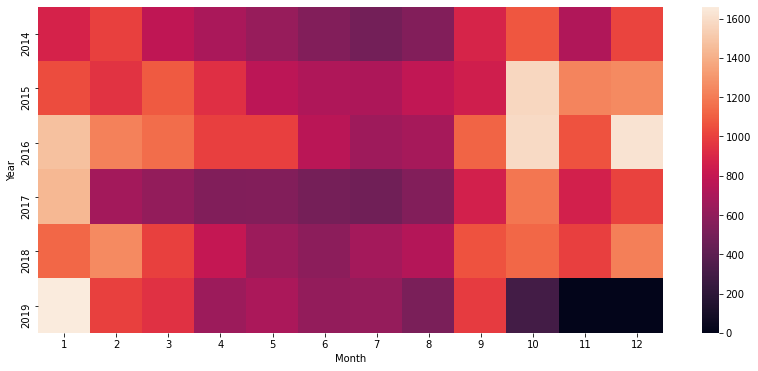

In [18]:
sns.heatmap(df_monthly_NO2BE)

In [ ]:
Из данного графика мы видим четкую сезонность продаж в осенне-зимний период - более светлый фон квадратов.
Однако, как раз для 2017 года - видим падение продаж, схожий , но не столько выраженный характер падения продаж виден и в 2014 году
Также хотелось бы обратить внимание на то, что вероятно датасет за 2019 год неполный - это видно по более темным полям в конце 2019 года.
Возможно, если построить тепловую карту за более длительный период в гг. - можно будет выявить сезонность второго уровня - 
падение продаж в разные года, связанную, например, с разными погодными условиями и как следствие, различной активностью 
простудных заболеваний (на эту мысль навела схожесть цветов для 2017 и 2014 гг.).